# Libraries

In [1]:
# !'/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/bin/python' -m pip uninstall tensorflow
# !'/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/bin/python' -m pip install tensorflow==2.14.0
# !'/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/bin/python' -m pip install matplotlib
# !'/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/bin/python' -m pip install scikit-learn
# First tensorflow version 2.12
# Now tensorflow version 2.14


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from tensorflow.keras import layers, models
from keras import Sequential
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


# from Functions1 import preprocess_grayscale_to_rgb, VGG_model, VGG_imagenet, MobileNet_imagenet, data_generator, evaluate_validation_set, evaluate_test_set, prepare_train_val_data
from Functions1 import load_and_filter_images, split_dataset
from Functions1 import load_and_preprocess_data, build_and_compile_model, train_model, evaluate_model
from plots import plot_confusion_matrix, plot_training_history, plot_training_history2


path_dir = os.getcwd()
np.random.seed(123)
tf.random.set_seed(123)

# Selected Images

In [3]:
dataset_dir_org = f'{path_dir}/Balanced_Data/Selected_Images/Original_selected_images/selected_images'
dataset_dir_ddpm = f'{path_dir}/Balanced_Data/Selected_Images/Mixed/DDPM_Mixed'
dataset_dir_pggans150 = f'{path_dir}/Balanced_Data/Selected_Images/Mixed/PGGANS150_Mixed'
dataset_dir_pggans160 = f'{path_dir}/Balanced_Data/Selected_Images/Mixed/PGGANS160_Mixed'
test_dataset_dir = f'{path_dir}/Balanced_Data/Selected_Images/Test_selected_data/Test'

class_labels = sorted(os.listdir(dataset_dir_org))
batch_size = 32
img_size = (224, 224)
input_shape = (224, 224, 3)
batch_size = 32
epochs = 20
n = 5    # number of runs

## CNN Classification classes

### Train: Original Data

2024-09-09 18:03:02.366492: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20
10/10 [==============================] - 14s 1s/step - loss: 3.3734 - accuracy: 0.6531 - val_loss: 24.5324 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 11s 1s/step - loss: 1.5509 - accuracy: 0.8224 - val_loss: 9.7747 - val_accuracy: 0.5938
Epoch 3/20
10/10 [==============================] - 11s 1s/step - loss: 1.1079 - accuracy: 0.8750 - val_loss: 2.4429 - val_accuracy: 0.6719
Epoch 4/20
10/10 [==============================] - 11s 1s/step - loss: 1.1093 - accuracy: 0.8980 - val_loss: 2.2902 - val_accuracy: 0.6875
Epoch 5/20
10/10 [==============================] - 11s 1s/step - loss: 1.1275 - accuracy: 0.8750 - val_loss: 2.2773 - val_accuracy: 0.6875
Epoch 6/20
10/10 [==============================] - 12s 1s/step - loss: 0.9506 - accuracy: 0.9250 - val_loss: 1.7521 - val_accuracy: 0.7500
Epoch 7/20
10/10 [==============================] - 12s 1s/step - loss: 0.9222 - accuracy: 0.9344 - val_loss: 2.9006 - val_accuracy: 0.5156
Epoch 8/20
10/10 [=

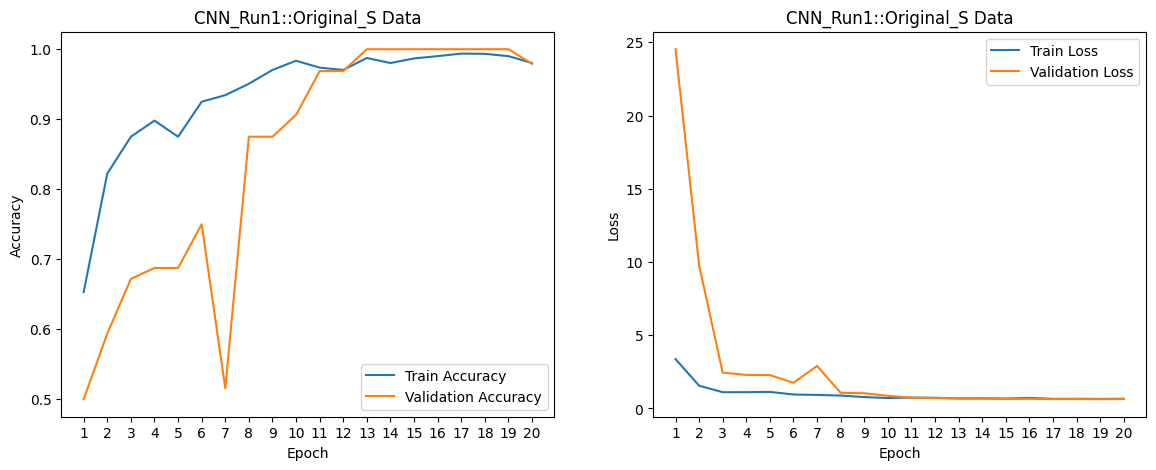

Confusion matrix, without normalization
[[1206   22]
 [ 205 1097]]
              precision    recall  f1-score   support

      NORMAL       0.85      0.98      0.91      1228
   PNEUMONIA       0.98      0.84      0.91      1302

    accuracy                           0.91      2530
   macro avg       0.92      0.91      0.91      2530
weighted avg       0.92      0.91      0.91      2530

Epoch 1/20
10/10 [==============================] - 13s 1s/step - loss: 3.1245 - accuracy: 0.6809 - val_loss: 10.7970 - val_accuracy: 0.4583
Epoch 2/20
10/10 [==============================] - 12s 1s/step - loss: 1.3492 - accuracy: 0.8219 - val_loss: 7.7950 - val_accuracy: 0.5156
Epoch 3/20
10/10 [==============================] - 11s 1s/step - loss: 1.4208 - accuracy: 0.8191 - val_loss: 2.2857 - val_accuracy: 0.7031
Epoch 4/20
10/10 [==============================] - 12s 1s/step - loss: 1.0407 - accuracy: 0.8938 - val_loss: 2.2982 - val_accuracy: 0.7500
Epoch 5/20
10/10 [===========================

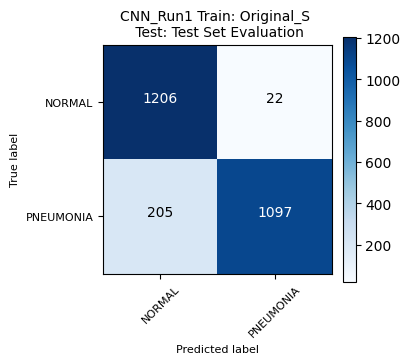

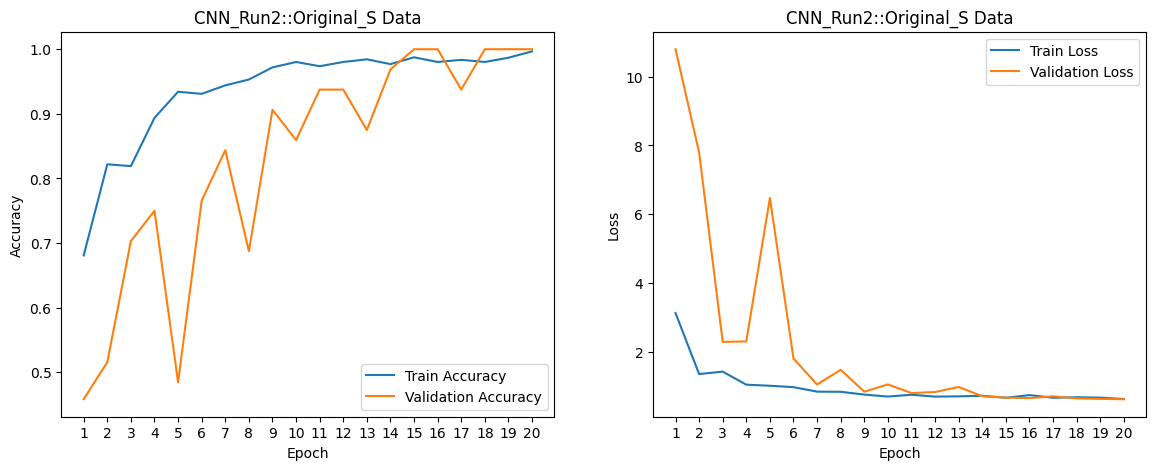

Confusion matrix, without normalization
[[1197   77]
 [ 160 1096]]
              precision    recall  f1-score   support

      NORMAL       0.88      0.94      0.91      1274
   PNEUMONIA       0.93      0.87      0.90      1256

    accuracy                           0.91      2530
   macro avg       0.91      0.91      0.91      2530
weighted avg       0.91      0.91      0.91      2530

Epoch 1/20
10/10 [==============================] - 13s 1s/step - loss: 3.4154 - accuracy: 0.6447 - val_loss: 8.9981 - val_accuracy: 0.4688
Epoch 2/20
10/10 [==============================] - 12s 1s/step - loss: 1.4093 - accuracy: 0.8322 - val_loss: 9.3706 - val_accuracy: 0.5469
Epoch 3/20
10/10 [==============================] - 11s 1s/step - loss: 1.1871 - accuracy: 0.8618 - val_loss: 4.1403 - val_accuracy: 0.5781
Epoch 4/20
10/10 [==============================] - 11s 1s/step - loss: 0.9853 - accuracy: 0.8947 - val_loss: 2.0624 - val_accuracy: 0.7188
Epoch 5/20
10/10 [============================

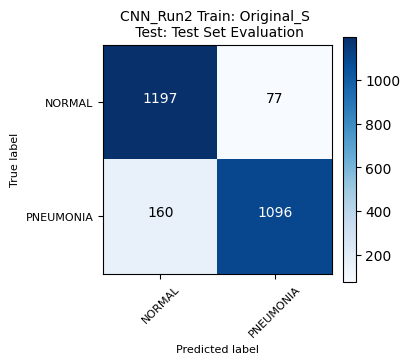

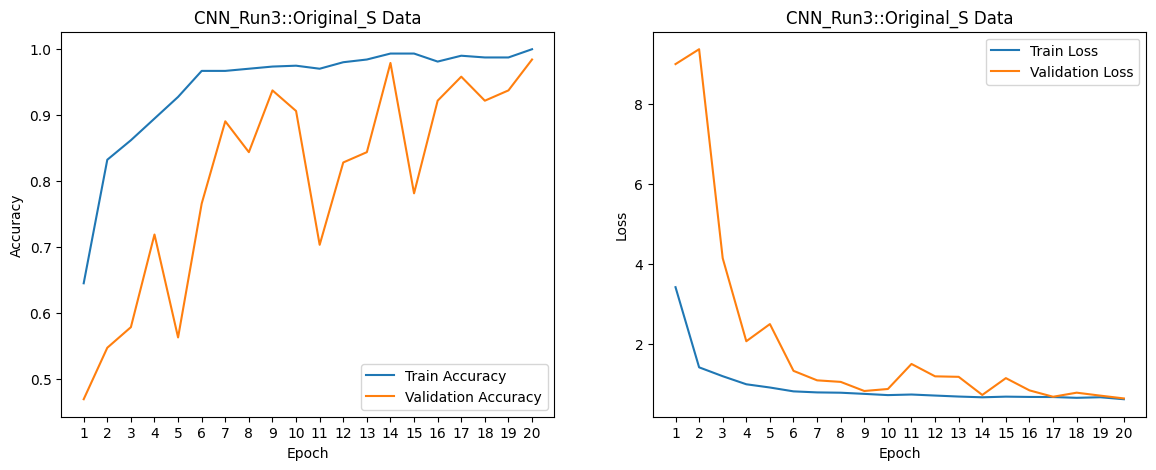

Confusion matrix, without normalization
[[1184  109]
 [ 122 1115]]
              precision    recall  f1-score   support

      NORMAL       0.91      0.92      0.91      1293
   PNEUMONIA       0.91      0.90      0.91      1237

    accuracy                           0.91      2530
   macro avg       0.91      0.91      0.91      2530
weighted avg       0.91      0.91      0.91      2530

Epoch 1/20
10/10 [==============================] - 13s 1s/step - loss: 2.7288 - accuracy: 0.6842 - val_loss: 3.9635 - val_accuracy: 0.7083
Epoch 2/20
10/10 [==============================] - 11s 1s/step - loss: 1.7338 - accuracy: 0.8355 - val_loss: 6.0381 - val_accuracy: 0.5312
Epoch 3/20
10/10 [==============================] - 12s 1s/step - loss: 1.5467 - accuracy: 0.8651 - val_loss: 2.7141 - val_accuracy: 0.6562
Epoch 4/20
10/10 [==============================] - 11s 1s/step - loss: 1.1126 - accuracy: 0.9046 - val_loss: 3.7010 - val_accuracy: 0.6250
Epoch 5/20
10/10 [============================

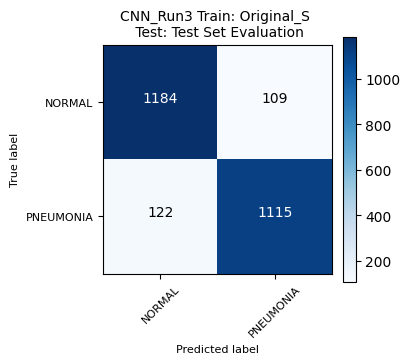

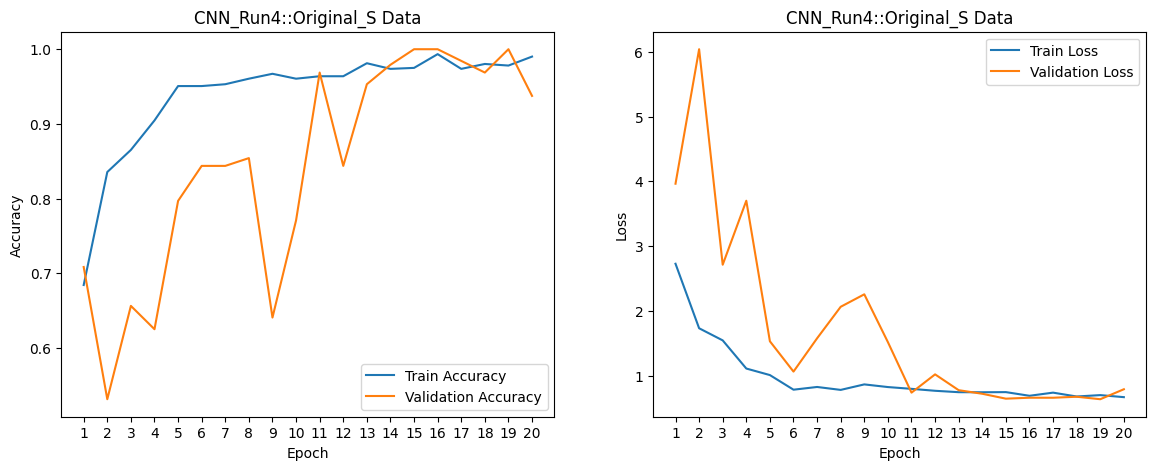

Confusion matrix, without normalization
[[ 886  346]
 [  47 1251]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.72      0.82      1232
   PNEUMONIA       0.78      0.96      0.86      1298

    accuracy                           0.84      2530
   macro avg       0.87      0.84      0.84      2530
weighted avg       0.86      0.84      0.84      2530

Epoch 1/20
10/10 [==============================] - 13s 1s/step - loss: 3.2166 - accuracy: 0.6809 - val_loss: 5.5744 - val_accuracy: 0.5469
Epoch 2/20
10/10 [==============================] - 11s 1s/step - loss: 1.7721 - accuracy: 0.8487 - val_loss: 1.1943 - val_accuracy: 0.8438
Epoch 3/20
10/10 [==============================] - 11s 1s/step - loss: 1.2246 - accuracy: 0.8750 - val_loss: 1.7868 - val_accuracy: 0.7344
Epoch 4/20
10/10 [==============================] - 11s 1s/step - loss: 1.2895 - accuracy: 0.9046 - val_loss: 2.3486 - val_accuracy: 0.6562
Epoch 5/20
10/10 [============================

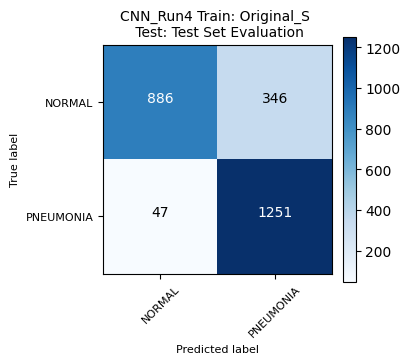

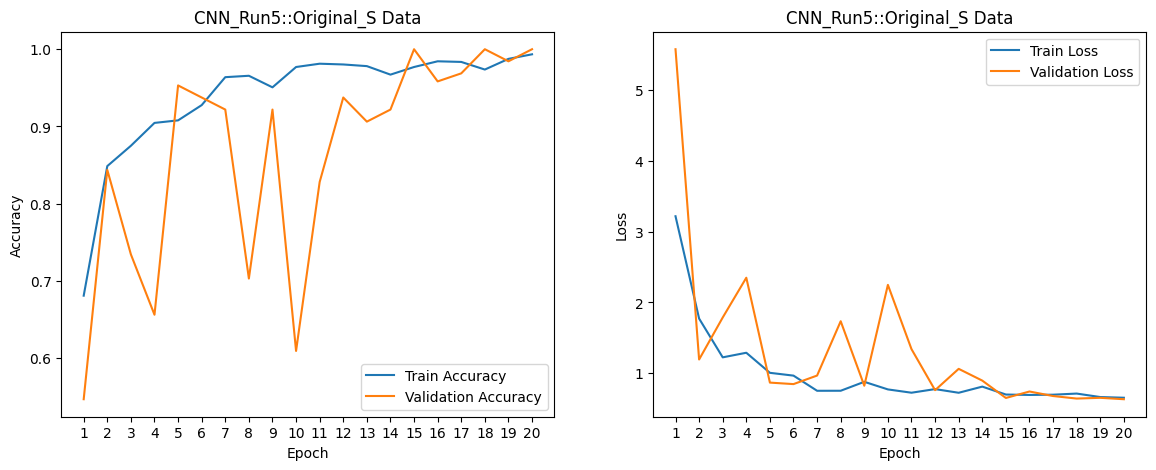

Confusion matrix, without normalization
[[1211  115]
 [  66 1168]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.91      0.93      1326
   PNEUMONIA       0.91      0.95      0.93      1234

    accuracy                           0.93      2560
   macro avg       0.93      0.93      0.93      2560
weighted avg       0.93      0.93      0.93      2560



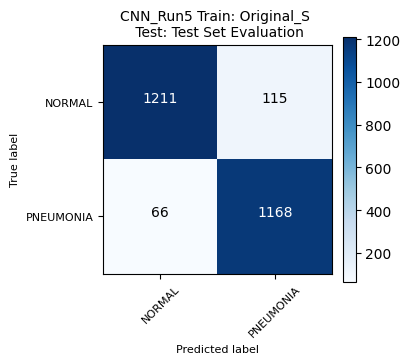

In [3]:
dataset_dir = dataset_dir_org
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds = load_and_preprocess_data(test_dataset_dir, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "Original_S Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds, class_labels, model_name=f"CNN_Run{i+1} Train: Original_S", title="Test Set Evaluation")


### Train: Mixed DDPM Data

Epoch 1/20
110/110 [==============================] - 134s 1s/step - loss: 1.6882 - accuracy: 0.8082 - val_loss: 0.9355 - val_accuracy: 0.9097
Epoch 2/20
110/110 [==============================] - 131s 1s/step - loss: 1.0633 - accuracy: 0.9215 - val_loss: 0.8024 - val_accuracy: 0.9502
Epoch 3/20
110/110 [==============================] - 132s 1s/step - loss: 0.9875 - accuracy: 0.9249 - val_loss: 0.9639 - val_accuracy: 0.8634
Epoch 4/20
110/110 [==============================] - 131s 1s/step - loss: 0.8654 - accuracy: 0.9412 - val_loss: 0.6729 - val_accuracy: 0.9769
Epoch 5/20
110/110 [==============================] - 131s 1s/step - loss: 0.7493 - accuracy: 0.9571 - val_loss: 0.6271 - val_accuracy: 0.9711
Epoch 6/20
110/110 [==============================] - 130s 1s/step - loss: 0.6594 - accuracy: 0.9695 - val_loss: 0.5691 - val_accuracy: 0.9861
Epoch 7/20
110/110 [==============================] - 131s 1s/step - loss: 0.6159 - accuracy: 0.9757 - val_loss: 0.5573 - val_accuracy: 0.9676

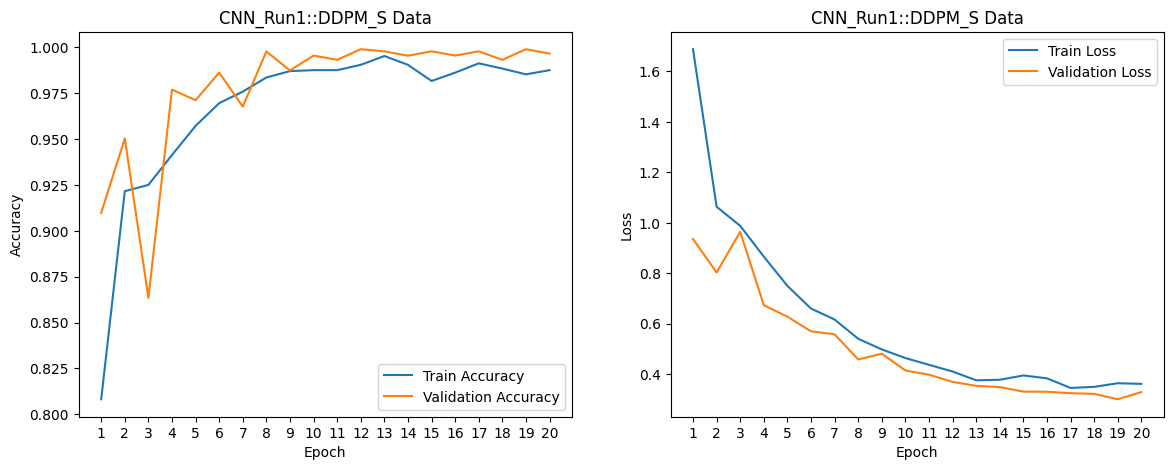

Confusion matrix, without normalization
[[1172   82]
 [ 143 1163]]
              precision    recall  f1-score   support

      NORMAL       0.89      0.93      0.91      1254
   PNEUMONIA       0.93      0.89      0.91      1306

    accuracy                           0.91      2560
   macro avg       0.91      0.91      0.91      2560
weighted avg       0.91      0.91      0.91      2560

Epoch 1/20
110/110 [==============================] - 134s 1s/step - loss: 2.0110 - accuracy: 0.7957 - val_loss: 1.2095 - val_accuracy: 0.7326
Epoch 2/20
110/110 [==============================] - 131s 1s/step - loss: 1.0979 - accuracy: 0.9067 - val_loss: 0.7779 - val_accuracy: 0.9583
Epoch 3/20
110/110 [==============================] - 131s 1s/step - loss: 0.9716 - accuracy: 0.9264 - val_loss: 0.7680 - val_accuracy: 0.9606
Epoch 4/20
110/110 [==============================] - 131s 1s/step - loss: 0.8911 - accuracy: 0.9455 - val_loss: 0.7168 - val_accuracy: 0.9611
Epoch 5/20
110/110 [==============

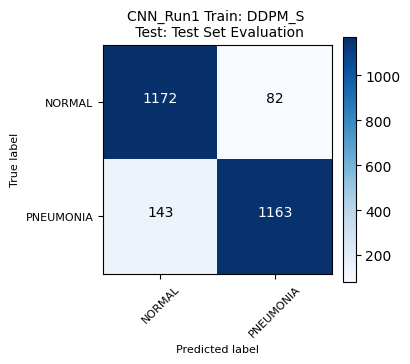

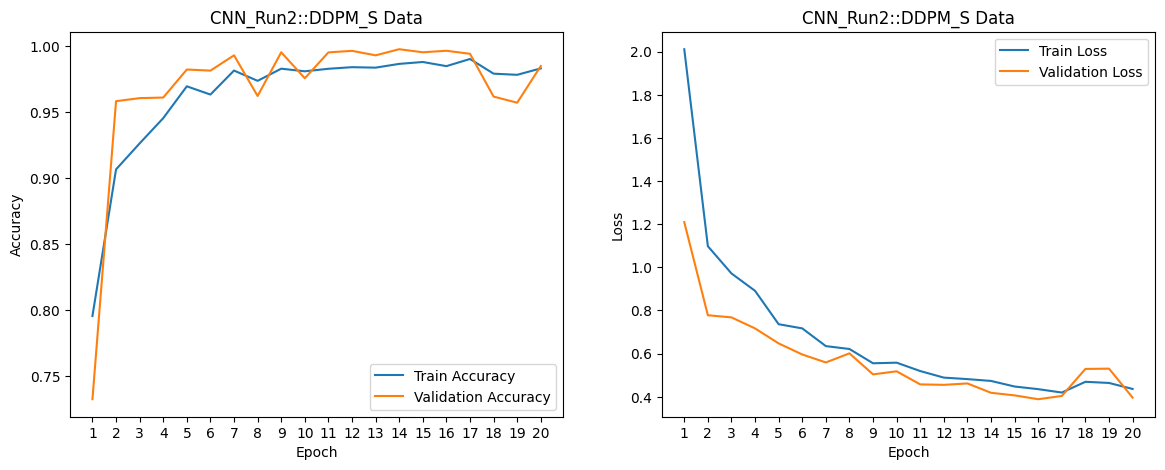

Confusion matrix, without normalization
[[1194  113]
 [  69 1154]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.91      0.93      1307
   PNEUMONIA       0.91      0.94      0.93      1223

    accuracy                           0.93      2530
   macro avg       0.93      0.93      0.93      2530
weighted avg       0.93      0.93      0.93      2530

Epoch 1/20
110/110 [==============================] - 134s 1s/step - loss: 1.9737 - accuracy: 0.7700 - val_loss: 1.2483 - val_accuracy: 0.7315
Epoch 2/20
110/110 [==============================] - 131s 1s/step - loss: 1.2609 - accuracy: 0.8724 - val_loss: 1.0030 - val_accuracy: 0.8538
Epoch 3/20
110/110 [==============================] - 131s 1s/step - loss: 1.0709 - accuracy: 0.9095 - val_loss: 0.7948 - val_accuracy: 0.9444
Epoch 4/20
110/110 [==============================] - 131s 1s/step - loss: 0.8677 - accuracy: 0.9366 - val_loss: 0.7229 - val_accuracy: 0.9540
Epoch 5/20
110/110 [==============

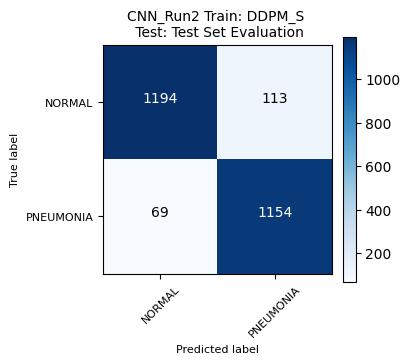

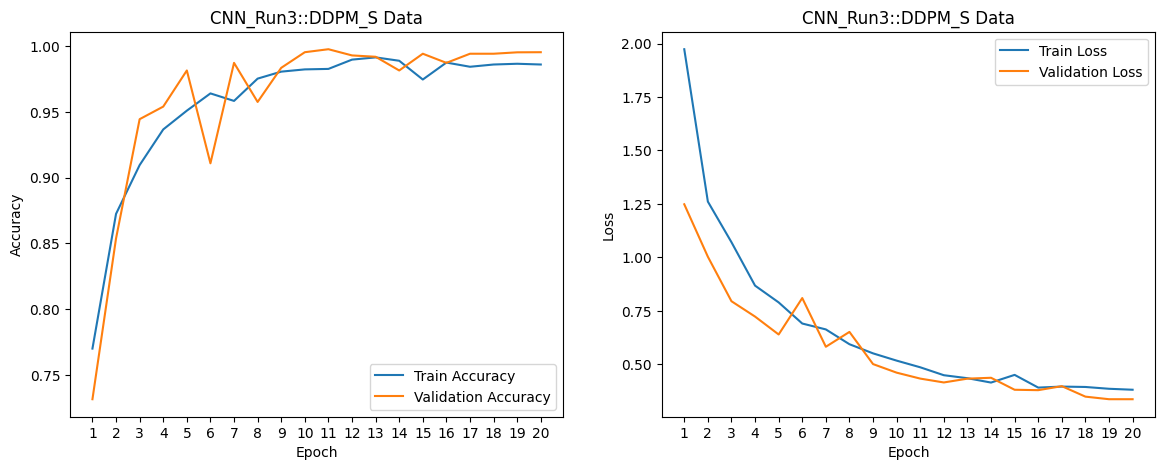

Confusion matrix, without normalization
[[1189   73]
 [ 113 1155]]
              precision    recall  f1-score   support

      NORMAL       0.91      0.94      0.93      1262
   PNEUMONIA       0.94      0.91      0.93      1268

    accuracy                           0.93      2530
   macro avg       0.93      0.93      0.93      2530
weighted avg       0.93      0.93      0.93      2530

Epoch 1/20
110/110 [==============================] - 134s 1s/step - loss: 2.1306 - accuracy: 0.7329 - val_loss: 1.2334 - val_accuracy: 0.7311
Epoch 2/20
110/110 [==============================] - 131s 1s/step - loss: 1.0597 - accuracy: 0.8904 - val_loss: 0.7640 - val_accuracy: 0.9502
Epoch 3/20
110/110 [==============================] - 131s 1s/step - loss: 0.9579 - accuracy: 0.9161 - val_loss: 0.8124 - val_accuracy: 0.9433
Epoch 4/20
110/110 [==============================] - 131s 1s/step - loss: 0.7992 - accuracy: 0.9443 - val_loss: 0.6573 - val_accuracy: 0.9676
Epoch 5/20
110/110 [==============

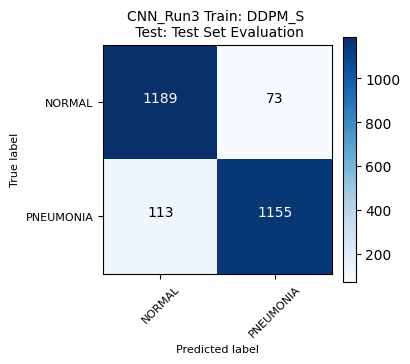

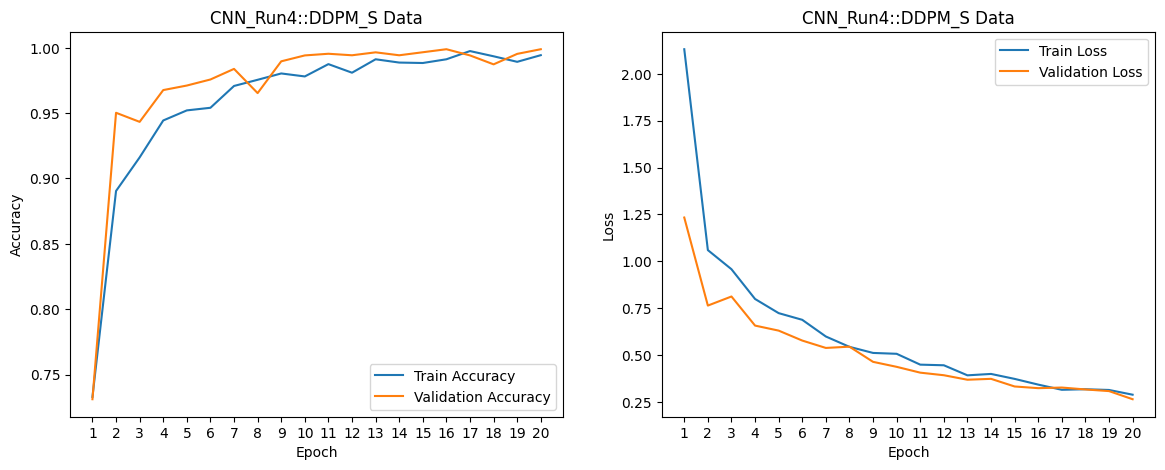

Confusion matrix, without normalization
[[1282   48]
 [ 162 1038]]
              precision    recall  f1-score   support

      NORMAL       0.89      0.96      0.92      1330
   PNEUMONIA       0.96      0.86      0.91      1200

    accuracy                           0.92      2530
   macro avg       0.92      0.91      0.92      2530
weighted avg       0.92      0.92      0.92      2530

Epoch 1/20
110/110 [==============================] - 135s 1s/step - loss: 2.0674 - accuracy: 0.7864 - val_loss: 3.1379 - val_accuracy: 0.5637
Epoch 2/20
110/110 [==============================] - 131s 1s/step - loss: 1.0797 - accuracy: 0.8955 - val_loss: 0.8400 - val_accuracy: 0.9236
Epoch 3/20
110/110 [==============================] - 131s 1s/step - loss: 0.9739 - accuracy: 0.9124 - val_loss: 0.7481 - val_accuracy: 0.9595
Epoch 4/20
110/110 [==============================] - 131s 1s/step - loss: 0.7830 - accuracy: 0.9452 - val_loss: 0.8743 - val_accuracy: 0.8703
Epoch 5/20
110/110 [==============

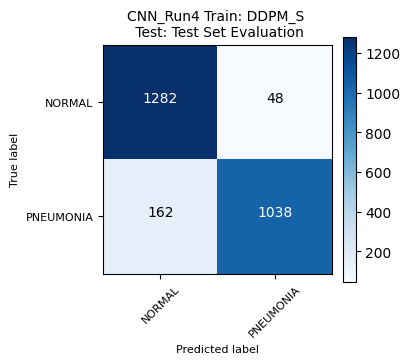

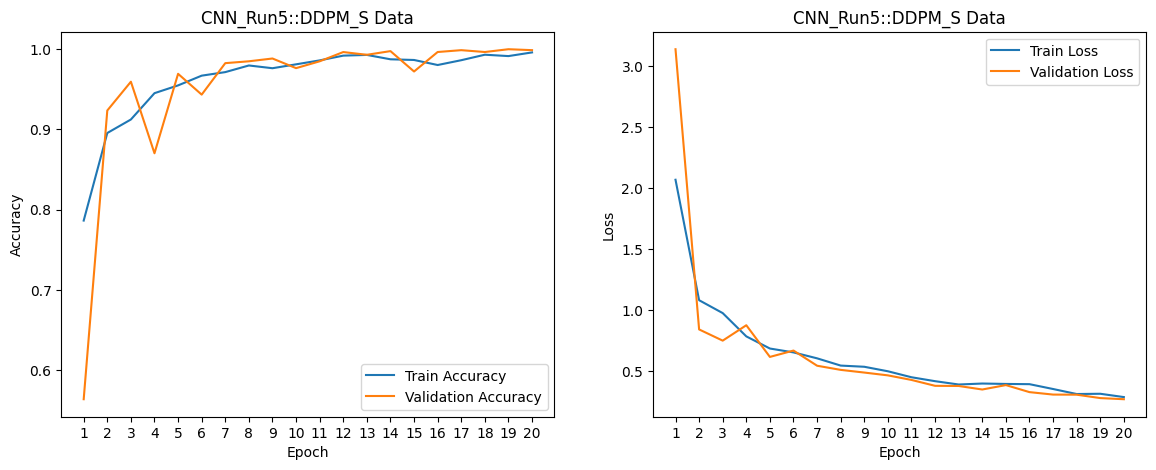

Confusion matrix, without normalization
[[1213   60]
 [  92 1165]]
              precision    recall  f1-score   support

      NORMAL       0.93      0.95      0.94      1273
   PNEUMONIA       0.95      0.93      0.94      1257

    accuracy                           0.94      2530
   macro avg       0.94      0.94      0.94      2530
weighted avg       0.94      0.94      0.94      2530



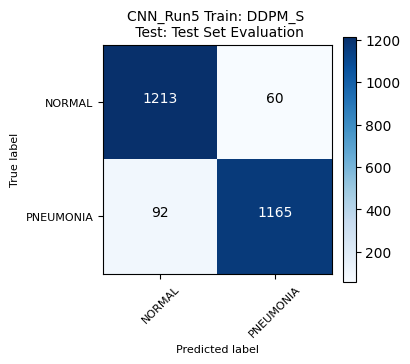

In [4]:
dataset_dir = dataset_dir_ddpm
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds = load_and_preprocess_data(test_dataset_dir, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "DDPM_S Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds, class_labels, model_name=f"CNN_Run{i+1} Train: DDPM_S", title="Test Set Evaluation")


### Train: Mixed PGGANs150k Data

Epoch 1/20
64/64 [==============================] - 78s 1s/step - loss: 1.6103 - accuracy: 0.8796 - val_loss: 2.6270 - val_accuracy: 0.3496
Epoch 2/20
64/64 [==============================] - 75s 1s/step - loss: 0.7484 - accuracy: 0.9827 - val_loss: 7.5129 - val_accuracy: 0.2832
Epoch 3/20
64/64 [==============================] - 76s 1s/step - loss: 0.6685 - accuracy: 0.9846 - val_loss: 1.6257 - val_accuracy: 0.8340
Epoch 4/20
64/64 [==============================] - 77s 1s/step - loss: 0.6373 - accuracy: 0.9888 - val_loss: 5.3310 - val_accuracy: 0.4199
Epoch 5/20
64/64 [==============================] - 75s 1s/step - loss: 0.5680 - accuracy: 0.9980 - val_loss: 0.5473 - val_accuracy: 0.9938
Epoch 6/20
64/64 [==============================] - 75s 1s/step - loss: 0.5338 - accuracy: 0.9995 - val_loss: 0.5177 - val_accuracy: 0.9941
Epoch 7/20
64/64 [==============================] - 76s 1s/step - loss: 0.5331 - accuracy: 0.9907 - val_loss: 2.0019 - val_accuracy: 0.8633
Epoch 8/20
64/64 [==

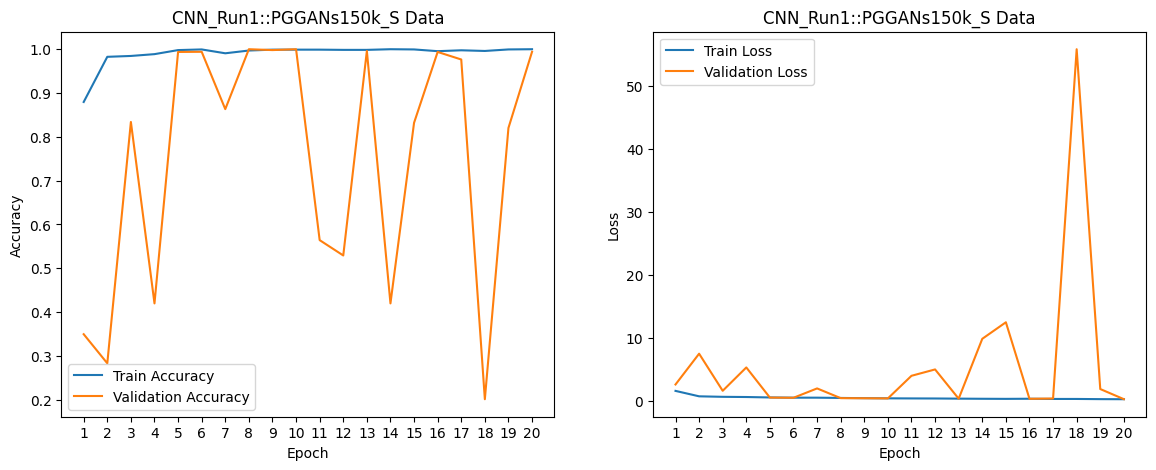

Confusion matrix, without normalization
[[   5 1348]
 [   7 1170]]
              precision    recall  f1-score   support

      NORMAL       0.42      0.00      0.01      1353
   PNEUMONIA       0.46      0.99      0.63      1177

    accuracy                           0.46      2530
   macro avg       0.44      0.50      0.32      2530
weighted avg       0.44      0.46      0.30      2530

Epoch 1/20
64/64 [==============================] - 78s 1s/step - loss: 1.6543 - accuracy: 0.8806 - val_loss: 9.1832 - val_accuracy: 0.2285
Epoch 2/20
64/64 [==============================] - 76s 1s/step - loss: 0.8384 - accuracy: 0.9559 - val_loss: 4.2978 - val_accuracy: 0.2884
Epoch 3/20
64/64 [==============================] - 76s 1s/step - loss: 0.7066 - accuracy: 0.9822 - val_loss: 0.6979 - val_accuracy: 0.9668
Epoch 4/20
64/64 [==============================] - 76s 1s/step - loss: 0.6319 - accuracy: 0.9901 - val_loss: 0.5967 - val_accuracy: 0.9961
Epoch 5/20
64/64 [============================

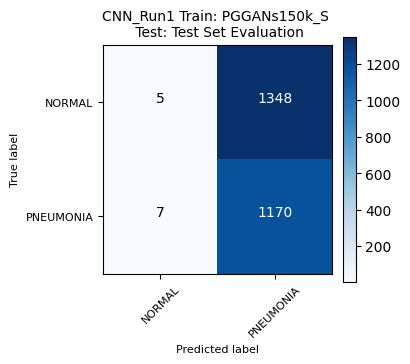

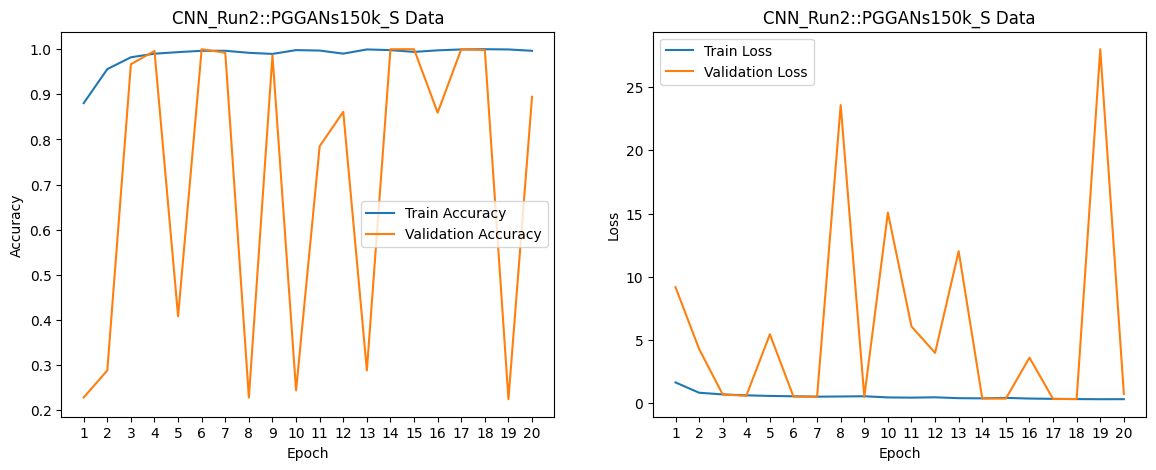

Confusion matrix, without normalization
[[  17 1236]
 [  26 1251]]
              precision    recall  f1-score   support

      NORMAL       0.40      0.01      0.03      1253
   PNEUMONIA       0.50      0.98      0.66      1277

    accuracy                           0.50      2530
   macro avg       0.45      0.50      0.35      2530
weighted avg       0.45      0.50      0.35      2530

Epoch 1/20
64/64 [==============================] - 78s 1s/step - loss: 1.5904 - accuracy: 0.8791 - val_loss: 1.2484 - val_accuracy: 0.8340
Epoch 2/20
64/64 [==============================] - 76s 1s/step - loss: 0.7268 - accuracy: 0.9802 - val_loss: 1.0541 - val_accuracy: 0.7930
Epoch 3/20
64/64 [==============================] - 76s 1s/step - loss: 0.6552 - accuracy: 0.9931 - val_loss: 4.7916 - val_accuracy: 0.3457
Epoch 4/20
64/64 [==============================] - 76s 1s/step - loss: 0.6278 - accuracy: 0.9945 - val_loss: 10.1044 - val_accuracy: 0.2598
Epoch 5/20
64/64 [===========================

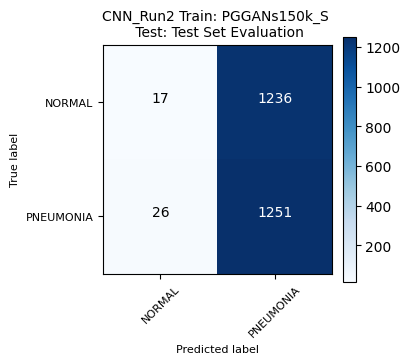

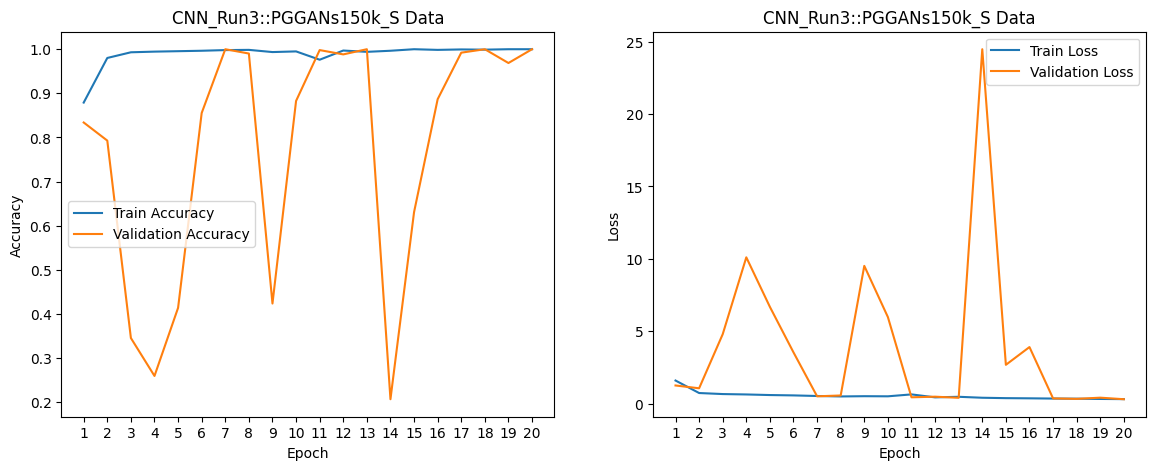

Confusion matrix, without normalization
[[  59 1220]
 [  21 1260]]
              precision    recall  f1-score   support

      NORMAL       0.74      0.05      0.09      1279
   PNEUMONIA       0.51      0.98      0.67      1281

    accuracy                           0.52      2560
   macro avg       0.62      0.51      0.38      2560
weighted avg       0.62      0.52      0.38      2560

Epoch 1/20
64/64 [==============================] - 78s 1s/step - loss: 1.3802 - accuracy: 0.9063 - val_loss: 5.3921 - val_accuracy: 0.2129
Epoch 2/20
64/64 [==============================] - 76s 1s/step - loss: 0.6861 - accuracy: 0.9941 - val_loss: 3.9670 - val_accuracy: 0.7910
Epoch 3/20
64/64 [==============================] - 75s 1s/step - loss: 0.6564 - accuracy: 0.9921 - val_loss: 6.6758 - val_accuracy: 0.2363
Epoch 4/20
64/64 [==============================] - 75s 1s/step - loss: 0.6048 - accuracy: 0.9970 - val_loss: 21.3016 - val_accuracy: 0.2168
Epoch 5/20
64/64 [===========================

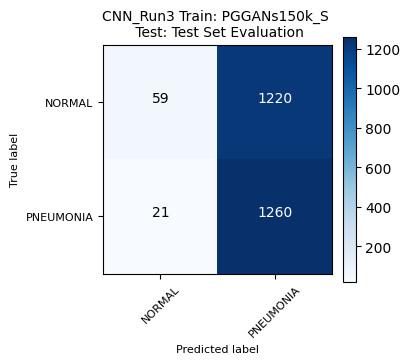

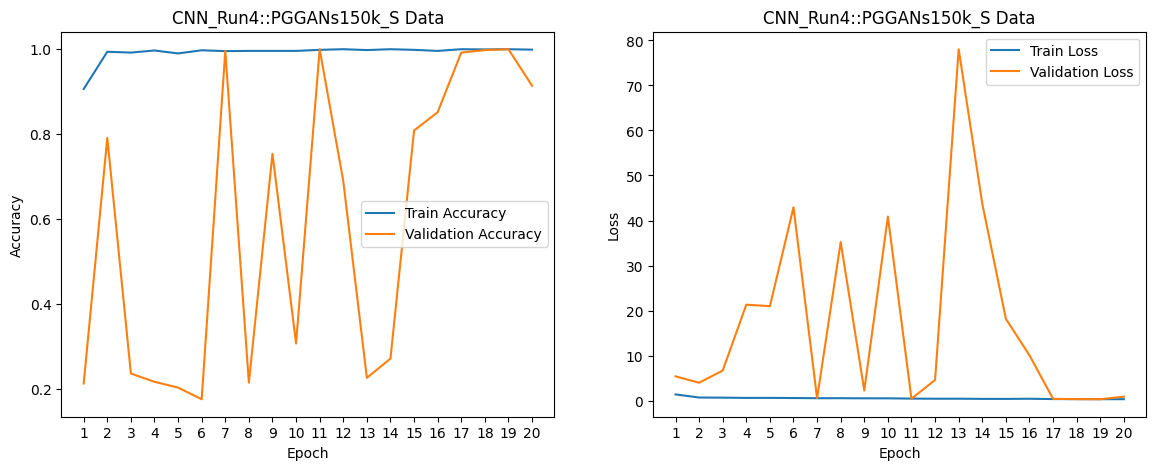

Confusion matrix, without normalization
[[  24 1152]
 [  65 1289]]
              precision    recall  f1-score   support

      NORMAL       0.27      0.02      0.04      1176
   PNEUMONIA       0.53      0.95      0.68      1354

    accuracy                           0.52      2530
   macro avg       0.40      0.49      0.36      2530
weighted avg       0.41      0.52      0.38      2530

Epoch 1/20
64/64 [==============================] - 78s 1s/step - loss: 1.3545 - accuracy: 0.8910 - val_loss: 8.2939 - val_accuracy: 0.2266
Epoch 2/20
64/64 [==============================] - 75s 1s/step - loss: 0.8155 - accuracy: 0.9673 - val_loss: 2.4174 - val_accuracy: 0.5938
Epoch 3/20
64/64 [==============================] - 75s 1s/step - loss: 0.7135 - accuracy: 0.9836 - val_loss: 0.6804 - val_accuracy: 0.9917
Epoch 4/20
64/64 [==============================] - 76s 1s/step - loss: 0.6661 - accuracy: 0.9863 - val_loss: 4.4469 - val_accuracy: 0.8105
Epoch 5/20
64/64 [============================

In [ ]:
dataset_dir = dataset_dir_pggans150
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds = load_and_preprocess_data(test_dataset_dir, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "PGGANs150k_S Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs150k_S", title="Test Set Evaluation")

### Train: Mixed PGGANs160k Data

In [ ]:
dataset_dir = dataset_dir_pggans160
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds = load_and_preprocess_data(test_dataset_dir, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "PGGANs160k_S Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs160k_S", title="Test Set Evaluation")

# Random Images

## CNN Classification classes

In [4]:
dataset_dir_org_rand = f'{path_dir}/Balanced_Data/Random_Images/Original_Random'
dataset_dir_ddpm_rand = f'{path_dir}/Balanced_Data/Random_Images/Mixed/DDPM_Mixed'
dataset_dir_pggans150_rand = f'{path_dir}/Balanced_Data/Random_Images/Mixed/PGGANS150_Mixed'
dataset_dir_pggans160_rand = f'{path_dir}/Balanced_Data/Random_Images/Mixed/PGGANS160_Mixed'
test_dataset_dir_rand = f'{path_dir}/Balanced_Data/Random_Images/Test_random'

class_labels = sorted(os.listdir(dataset_dir_org_rand))
batch_size = 32
img_size = (224, 224)
input_shape = (224, 224, 3)
batch_size = 32
epochs = 20
n = 5    # number of runs


### Train: Originial Data 


In [ ]:
dataset_dir = dataset_dir_org_rand
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds = load_and_preprocess_data(test_dataset_dir_rand, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "Original_R Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds, class_labels, model_name=f"CNN_Run{i+1} Train: Original_R", title="Test Set Evaluation")

### Train: Original & DDPM Data

Epoch 1/20
108/108 [==============================] - 122s 1s/step - loss: 1.7006 - accuracy: 0.8376 - val_loss: 2.2199 - val_accuracy: 0.6979
Epoch 2/20
108/108 [==============================] - 120s 1s/step - loss: 0.9377 - accuracy: 0.9560 - val_loss: 0.7110 - val_accuracy: 0.9815
Epoch 3/20
108/108 [==============================] - 119s 1s/step - loss: 0.8175 - accuracy: 0.9721 - val_loss: 0.7213 - val_accuracy: 0.9525
Epoch 4/20
108/108 [==============================] - 119s 1s/step - loss: 0.7014 - accuracy: 0.9817 - val_loss: 0.8436 - val_accuracy: 0.9097
Epoch 5/20
108/108 [==============================] - 119s 1s/step - loss: 0.6590 - accuracy: 0.9788 - val_loss: 0.5786 - val_accuracy: 0.9953
Epoch 6/20
108/108 [==============================] - 119s 1s/step - loss: 0.5972 - accuracy: 0.9843 - val_loss: 0.5427 - val_accuracy: 0.9954
Epoch 7/20
108/108 [==============================] - 119s 1s/step - loss: 0.5523 - accuracy: 0.9895 - val_loss: 0.5208 - val_accuracy: 0.9965

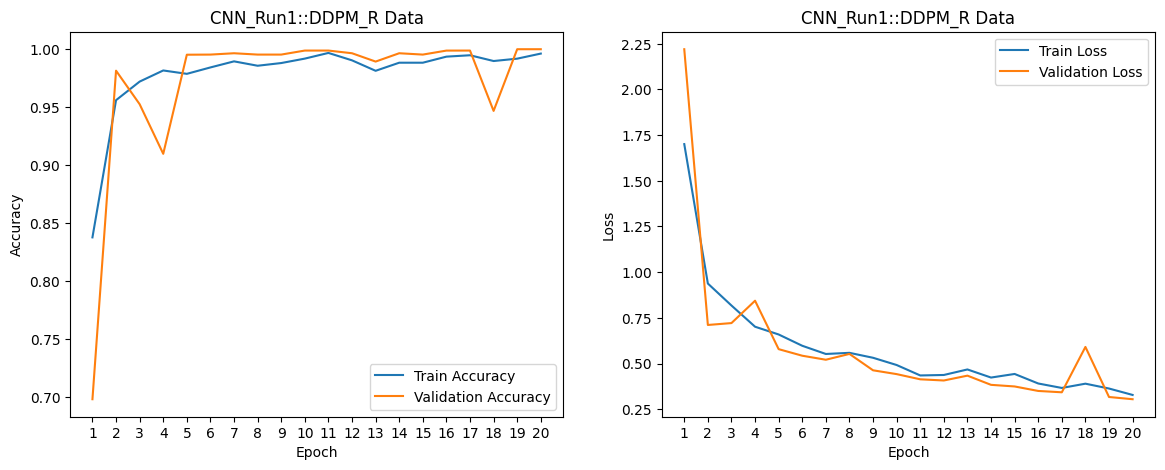

Confusion matrix, without normalization
[[1101  141]
 [  54 1264]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.89      0.92      1242
   PNEUMONIA       0.90      0.96      0.93      1318

    accuracy                           0.92      2560
   macro avg       0.93      0.92      0.92      2560
weighted avg       0.93      0.92      0.92      2560

Epoch 1/20
108/108 [==============================] - 122s 1s/step - loss: 1.7669 - accuracy: 0.8775 - val_loss: 1.7704 - val_accuracy: 0.7025
Epoch 2/20
108/108 [==============================] - 119s 1s/step - loss: 0.8979 - accuracy: 0.9555 - val_loss: 0.8636 - val_accuracy: 0.9468
Epoch 3/20
108/108 [==============================] - 119s 1s/step - loss: 0.8090 - accuracy: 0.9763 - val_loss: 0.6822 - val_accuracy: 0.9745
Epoch 4/20
108/108 [==============================] - 119s 1s/step - loss: 0.6660 - accuracy: 0.9811 - val_loss: 0.5613 - val_accuracy: 1.0000
Epoch 5/20
108/108 [==============

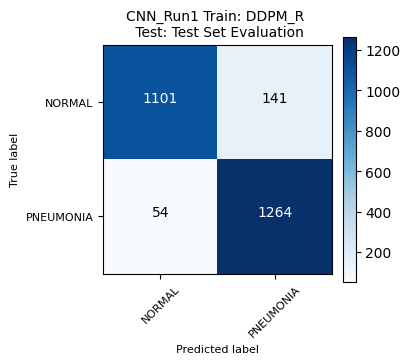

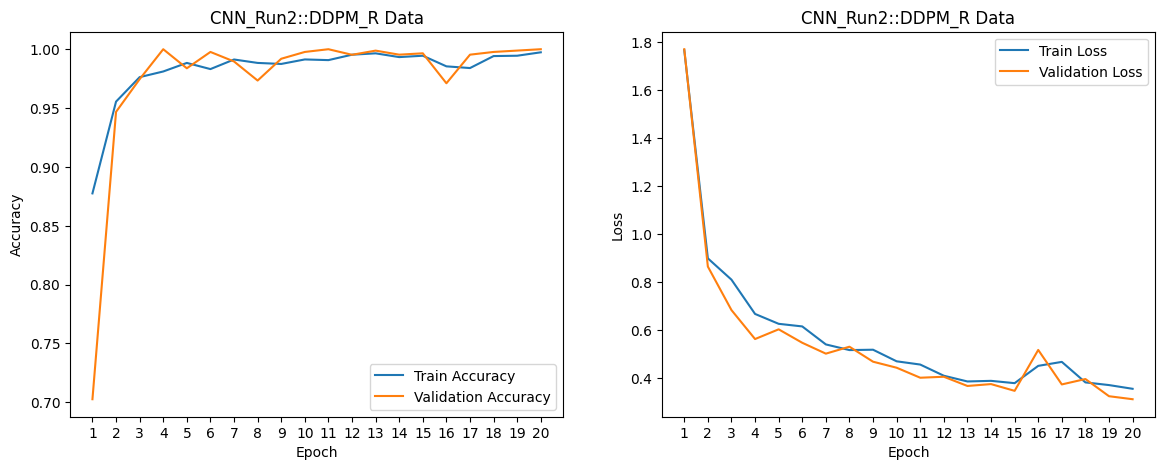

Confusion matrix, without normalization
[[1119  201]
 [  44 1178]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.85      0.90      1320
   PNEUMONIA       0.85      0.96      0.91      1222

    accuracy                           0.90      2542
   macro avg       0.91      0.91      0.90      2542
weighted avg       0.91      0.90      0.90      2542

Epoch 1/20
108/108 [==============================] - 121s 1s/step - loss: 1.7236 - accuracy: 0.8495 - val_loss: 0.8920 - val_accuracy: 0.8993
Epoch 2/20
108/108 [==============================] - 119s 1s/step - loss: 0.8888 - accuracy: 0.9561 - val_loss: 0.7029 - val_accuracy: 0.9838
Epoch 3/20
108/108 [==============================] - 119s 1s/step - loss: 0.7693 - accuracy: 0.9729 - val_loss: 0.6213 - val_accuracy: 0.9954
Epoch 4/20
108/108 [==============================] - 119s 1s/step - loss: 0.7025 - accuracy: 0.9811 - val_loss: 0.5785 - val_accuracy: 0.9965
Epoch 5/20
108/108 [==============

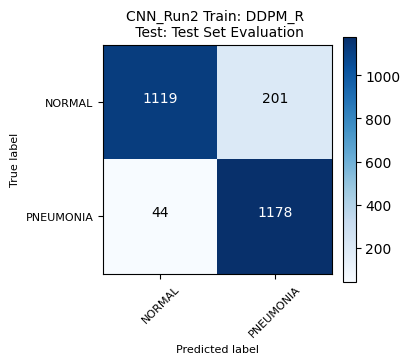

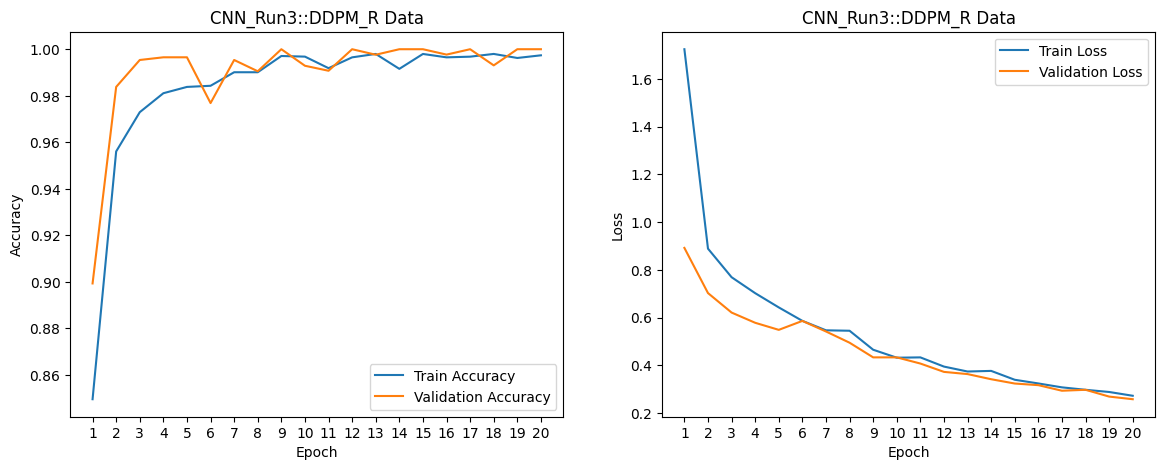

Confusion matrix, without normalization
[[1166  112]
 [  84 1180]]
              precision    recall  f1-score   support

      NORMAL       0.93      0.91      0.92      1278
   PNEUMONIA       0.91      0.93      0.92      1264

    accuracy                           0.92      2542
   macro avg       0.92      0.92      0.92      2542
weighted avg       0.92      0.92      0.92      2542

Epoch 1/20
108/108 [==============================] - 122s 1s/step - loss: 1.5707 - accuracy: 0.8833 - val_loss: 0.9842 - val_accuracy: 0.8831
Epoch 2/20
108/108 [==============================] - 119s 1s/step - loss: 0.8356 - accuracy: 0.9732 - val_loss: 0.6949 - val_accuracy: 0.9884
Epoch 3/20
108/108 [==============================] - 120s 1s/step - loss: 0.7865 - accuracy: 0.9715 - val_loss: 0.6670 - val_accuracy: 0.9826
Epoch 4/20
108/108 [==============================] - 119s 1s/step - loss: 0.7956 - accuracy: 0.9715 - val_loss: 0.6027 - val_accuracy: 0.9919
Epoch 5/20
108/108 [==============

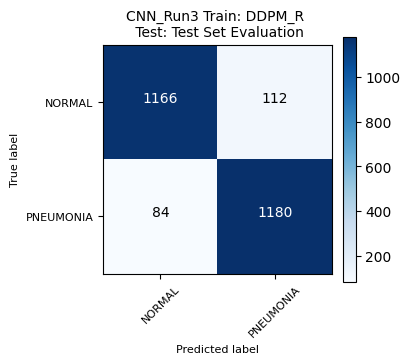

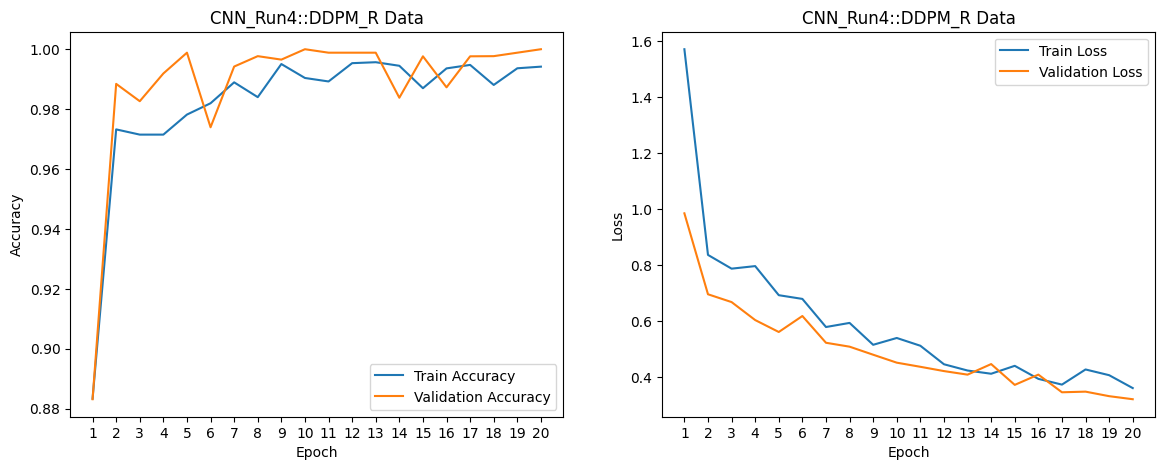

Confusion matrix, without normalization
[[1075  148]
 [  50 1269]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.88      0.92      1223
   PNEUMONIA       0.90      0.96      0.93      1319

    accuracy                           0.92      2542
   macro avg       0.93      0.92      0.92      2542
weighted avg       0.92      0.92      0.92      2542

Epoch 1/20
108/108 [==============================] - 123s 1s/step - loss: 1.6409 - accuracy: 0.8824 - val_loss: 0.8705 - val_accuracy: 0.9306
Epoch 2/20
108/108 [==============================] - 120s 1s/step - loss: 0.9476 - accuracy: 0.9592 - val_loss: 0.6823 - val_accuracy: 0.9757
Epoch 3/20
108/108 [==============================] - 118s 1s/step - loss: 0.9208 - accuracy: 0.9581 - val_loss: 0.6310 - val_accuracy: 0.9882
Epoch 4/20
108/108 [==============================] - 119s 1s/step - loss: 0.6838 - accuracy: 0.9828 - val_loss: 0.6545 - val_accuracy: 0.9873
Epoch 5/20
108/108 [==============

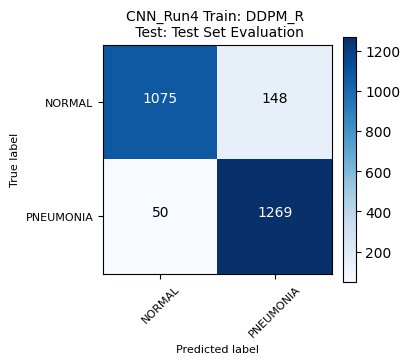

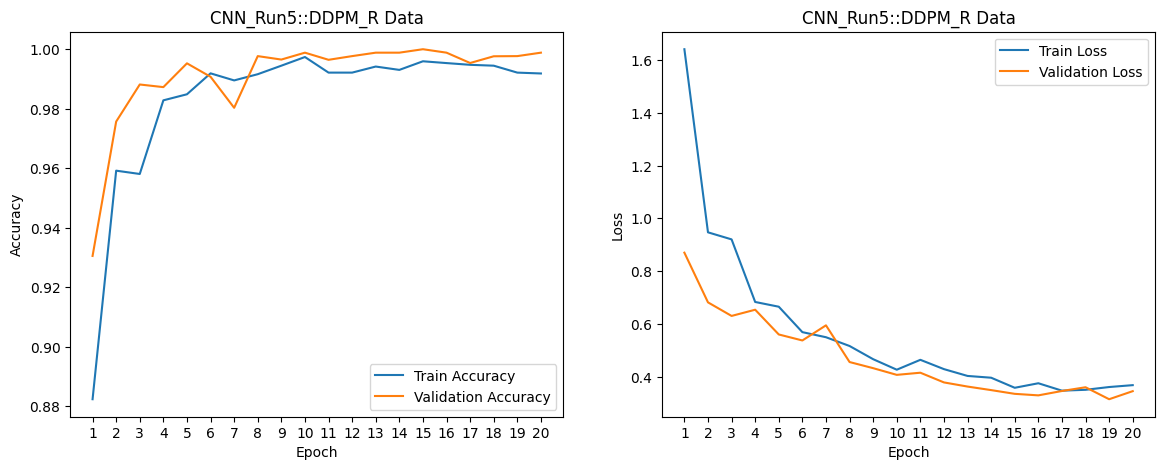

Confusion matrix, without normalization
[[1169   46]
 [ 133 1194]]
              precision    recall  f1-score   support

      NORMAL       0.90      0.96      0.93      1215
   PNEUMONIA       0.96      0.90      0.93      1327

    accuracy                           0.93      2542
   macro avg       0.93      0.93      0.93      2542
weighted avg       0.93      0.93      0.93      2542



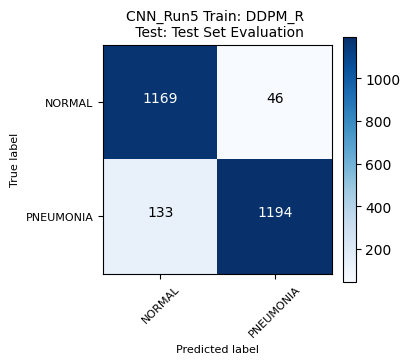

In [10]:
dataset_dir = dataset_dir_ddpm_rand
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds = load_and_preprocess_data(test_dataset_dir_rand, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "DDPM_R Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds, class_labels, model_name=f"CNN_Run{i+1} Train: DDPM_R", title="Test Set Evaluation")

### Train: Original & PGGANs150k Data

2024-09-11 10:36:31.079303: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/20
110/110 [==============================] - 125s 1s/step - loss: 1.7788 - accuracy: 0.8493 - val_loss: 3.3072 - val_accuracy: 0.6574
Epoch 2/20
110/110 [==============================] - 122s 1s/step - loss: 0.9456 - accuracy: 0.9600 - val_loss: 0.8238 - val_accuracy: 0.9151
Epoch 3/20
110/110 [==============================] - 122s 1s/step - loss: 0.7478 - accuracy: 0.9795 - val_loss: 0.5925 - val_accuracy: 0.9954
Epoch 4/20
110/110 [==============================] - 122s 1s/step - loss: 0.6756 - accuracy: 0.9869 - val_loss: 1.0346 - val_accuracy: 0.8495
Epoch 5/20
110/110 [==============================] - 122s 1s/step - loss: 0.5856 - accuracy: 0.9923 - val_loss: 0.5068 - val_accuracy: 1.0000
Epoch 6/20
110/110 [==============================] - 122s 1s/step - loss: 0.5905 - accuracy: 0.9869 - val_loss: 0.6507 - val_accuracy: 0.9630
Epoch 7/20
110/110 [==============================] - 121s 1s/step - loss: 0.5466 - accuracy: 0.9880 - val_loss: 0.5531 - val_accuracy: 0.9745

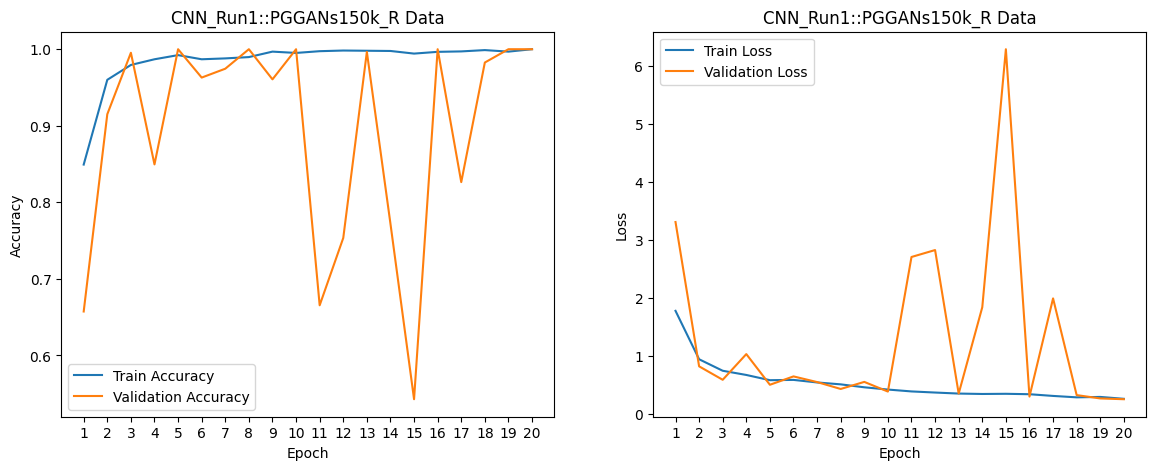

Confusion matrix, without normalization
[[ 987  293]
 [  87 1175]]
              precision    recall  f1-score   support

      NORMAL       0.92      0.77      0.84      1280
   PNEUMONIA       0.80      0.93      0.86      1262

    accuracy                           0.85      2542
   macro avg       0.86      0.85      0.85      2542
weighted avg       0.86      0.85      0.85      2542

Epoch 1/20
110/110 [==============================] - 127s 1s/step - loss: 1.9803 - accuracy: 0.7691 - val_loss: 4.9067 - val_accuracy: 0.4132
Epoch 2/20
110/110 [==============================] - 124s 1s/step - loss: 0.9265 - accuracy: 0.9546 - val_loss: 0.7876 - val_accuracy: 0.9421
Epoch 3/20
110/110 [==============================] - 124s 1s/step - loss: 0.7802 - accuracy: 0.9749 - val_loss: 0.7131 - val_accuracy: 0.9664
Epoch 4/20
110/110 [==============================] - 124s 1s/step - loss: 0.7816 - accuracy: 0.9759 - val_loss: 0.8218 - val_accuracy: 0.8877
Epoch 5/20
110/110 [==============

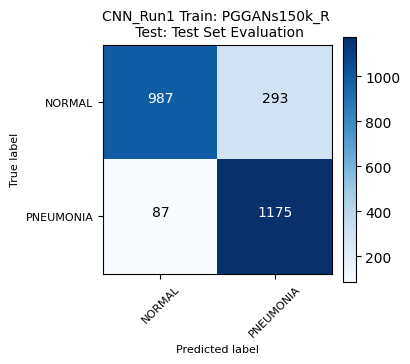

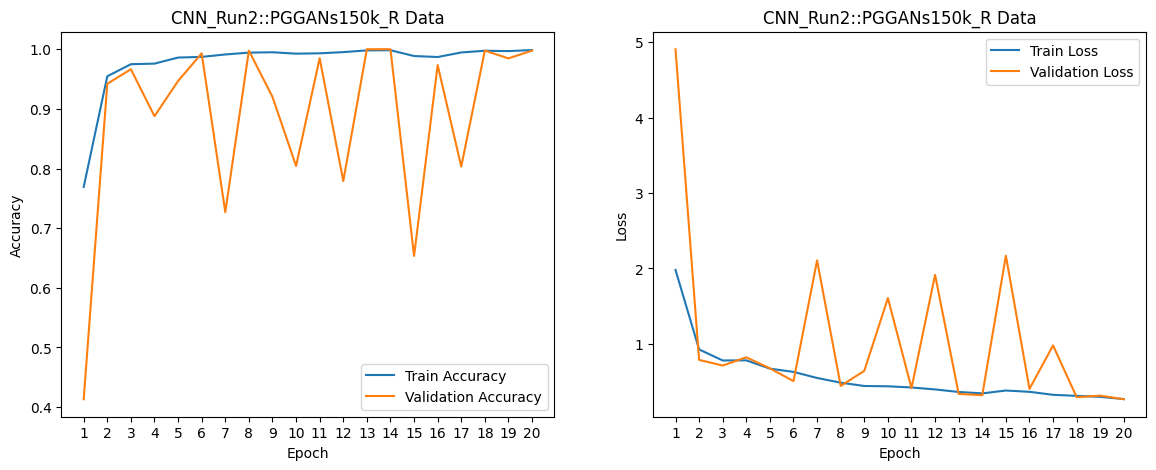

Confusion matrix, without normalization
[[1184  167]
 [  74 1117]]
              precision    recall  f1-score   support

      NORMAL       0.94      0.88      0.91      1351
   PNEUMONIA       0.87      0.94      0.90      1191

    accuracy                           0.91      2542
   macro avg       0.91      0.91      0.91      2542
weighted avg       0.91      0.91      0.91      2542

Epoch 1/20
110/110 [==============================] - 136s 1s/step - loss: 1.8605 - accuracy: 0.7777 - val_loss: 1.0243 - val_accuracy: 0.8530
Epoch 2/20
110/110 [==============================] - 135s 1s/step - loss: 0.7830 - accuracy: 0.9578 - val_loss: 0.6681 - val_accuracy: 0.9757
Epoch 3/20
110/110 [==============================] - 137s 1s/step - loss: 0.6906 - accuracy: 0.9787 - val_loss: 0.6835 - val_accuracy: 0.9410
Epoch 4/20
110/110 [==============================] - 138s 1s/step - loss: 0.6559 - accuracy: 0.9803 - val_loss: 0.5044 - val_accuracy: 0.9954
Epoch 5/20
110/110 [==============

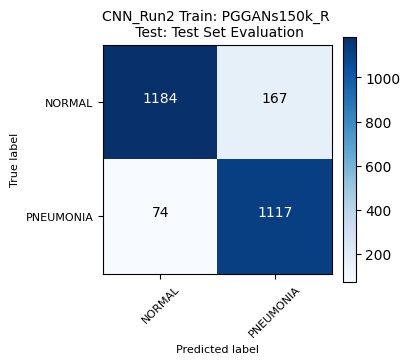

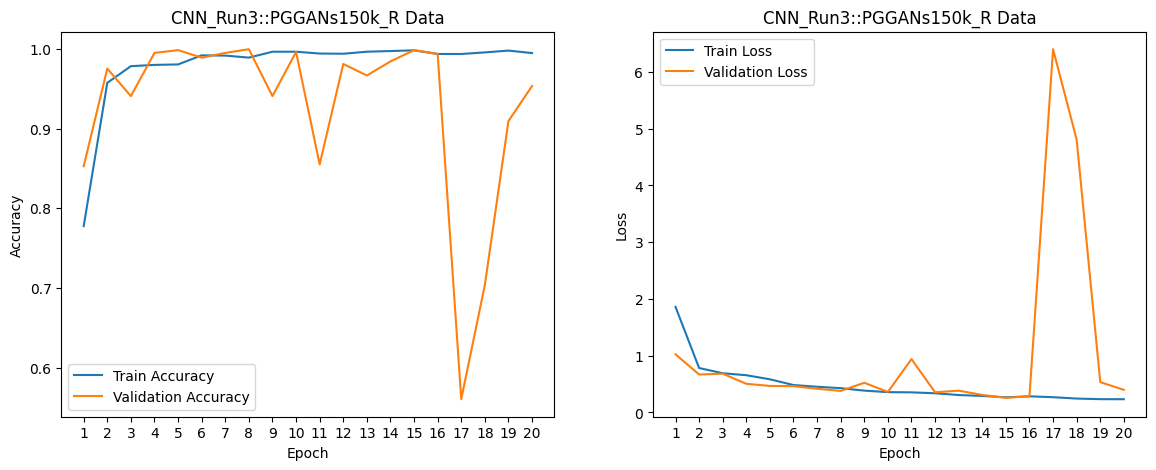

Confusion matrix, without normalization
[[1231   50]
 [ 176 1085]]
              precision    recall  f1-score   support

      NORMAL       0.87      0.96      0.92      1281
   PNEUMONIA       0.96      0.86      0.91      1261

    accuracy                           0.91      2542
   macro avg       0.92      0.91      0.91      2542
weighted avg       0.92      0.91      0.91      2542

Epoch 1/20
110/110 [==============================] - 131s 1s/step - loss: 2.2815 - accuracy: 0.7648 - val_loss: 3.2769 - val_accuracy: 0.5498
Epoch 2/20
110/110 [==============================] - 130s 1s/step - loss: 0.9381 - accuracy: 0.9455 - val_loss: 0.8388 - val_accuracy: 0.9151
Epoch 3/20
110/110 [==============================] - 126s 1s/step - loss: 0.7930 - accuracy: 0.9659 - val_loss: 0.5965 - val_accuracy: 0.9884
Epoch 4/20
110/110 [==============================] - 131s 1s/step - loss: 0.7179 - accuracy: 0.9723 - val_loss: 0.6178 - val_accuracy: 0.9850
Epoch 5/20
110/110 [==============

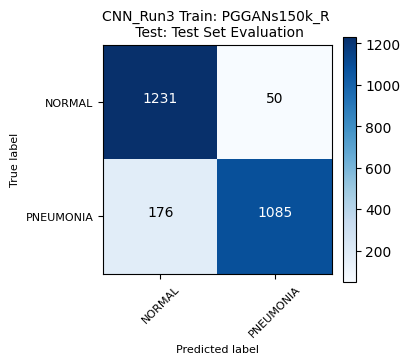

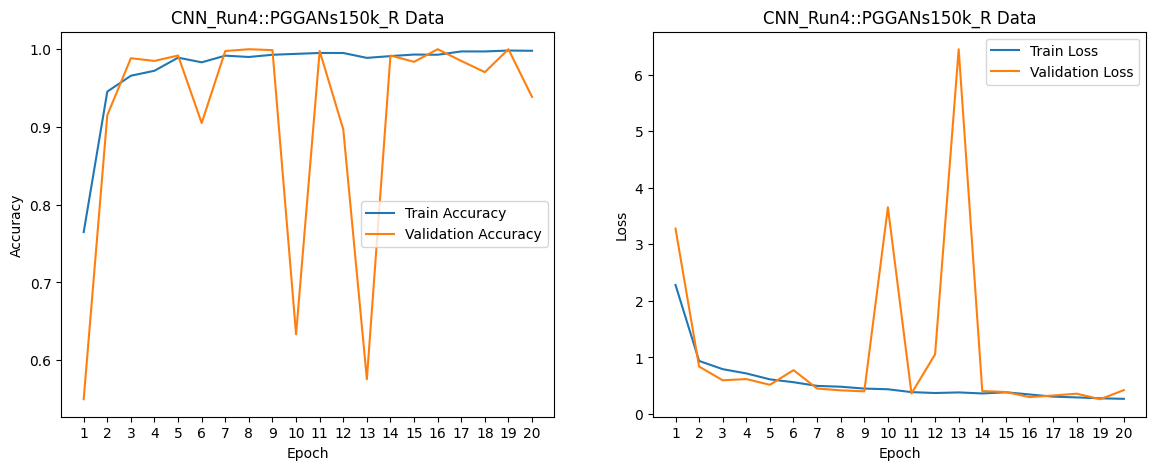

Confusion matrix, without normalization
[[ 788  408]
 [  40 1306]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.66      0.78      1196
   PNEUMONIA       0.76      0.97      0.85      1346

    accuracy                           0.82      2542
   macro avg       0.86      0.81      0.82      2542
weighted avg       0.85      0.82      0.82      2542

Epoch 1/20
110/110 [==============================] - 139s 1s/step - loss: 1.8701 - accuracy: 0.8099 - val_loss: 2.5166 - val_accuracy: 0.5660
Epoch 2/20
110/110 [==============================] - 135s 1s/step - loss: 0.9802 - accuracy: 0.9421 - val_loss: 0.8037 - val_accuracy: 0.9468
Epoch 3/20
110/110 [==============================] - 130s 1s/step - loss: 0.7624 - accuracy: 0.9699 - val_loss: 1.0053 - val_accuracy: 0.8275
Epoch 4/20
110/110 [==============================] - 134s 1s/step - loss: 0.6237 - accuracy: 0.9838 - val_loss: 1.0360 - val_accuracy: 0.8333
Epoch 5/20
110/110 [==============

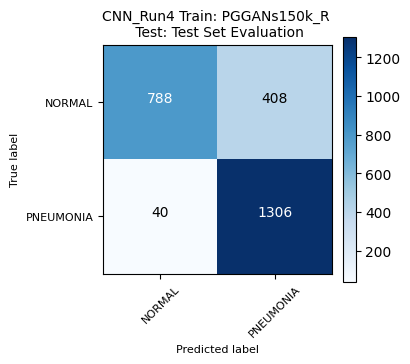

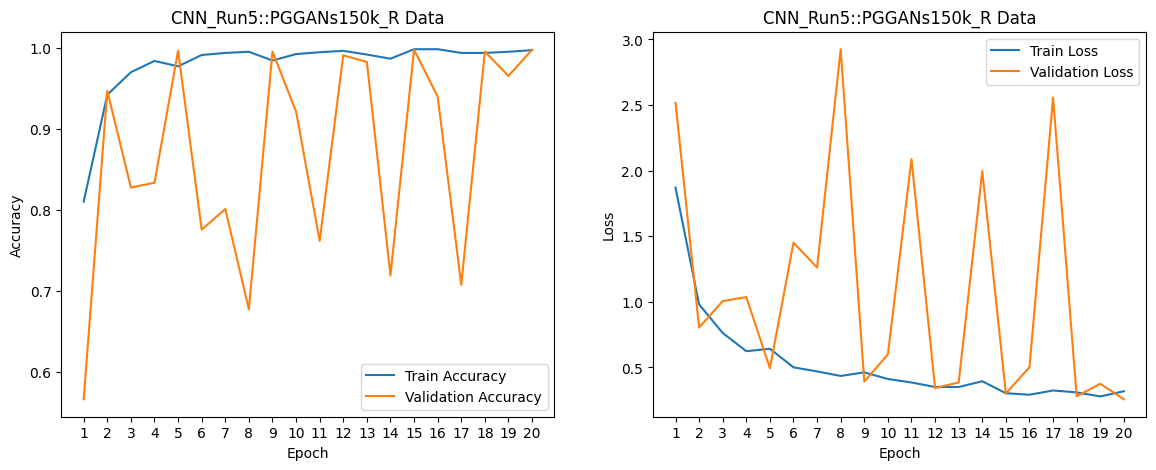

Confusion matrix, without normalization
[[1035  203]
 [  82 1222]]
              precision    recall  f1-score   support

      NORMAL       0.93      0.84      0.88      1238
   PNEUMONIA       0.86      0.94      0.90      1304

    accuracy                           0.89      2542
   macro avg       0.89      0.89      0.89      2542
weighted avg       0.89      0.89      0.89      2542



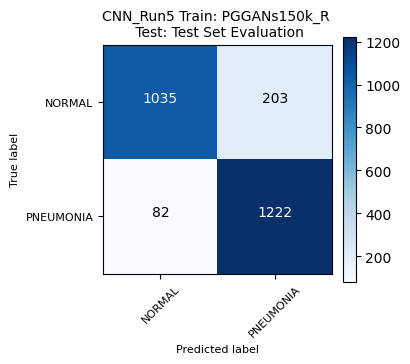

In [4]:
dataset_dir = dataset_dir_pggans150_rand
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds = load_and_preprocess_data(test_dataset_dir_rand, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "PGGANs150k_R Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs150k_R", title="Test Set Evaluation")

### Train: Original & PGGANs160k Data

2024-09-11 21:25:37.107004: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/20
110/110 [==============================] - 125s 1s/step - loss: 2.3565 - accuracy: 0.7217 - val_loss: 2.1889 - val_accuracy: 0.5012
Epoch 2/20
110/110 [==============================] - 121s 1s/step - loss: 1.1755 - accuracy: 0.8650 - val_loss: 0.8831 - val_accuracy: 0.9175
Epoch 3/20
110/110 [==============================] - 122s 1s/step - loss: 0.8446 - accuracy: 0.9418 - val_loss: 0.7412 - val_accuracy: 0.9491
Epoch 4/20
110/110 [==============================] - 122s 1s/step - loss: 0.7365 - accuracy: 0.9580 - val_loss: 0.7052 - val_accuracy: 0.9525
Epoch 5/20
110/110 [==============================] - 122s 1s/step - loss: 0.6830 - accuracy: 0.9660 - val_loss: 0.5819 - val_accuracy: 0.9919
Epoch 6/20
110/110 [==============================] - 122s 1s/step - loss: 0.6389 - accuracy: 0.9749 - val_loss: 0.5470 - val_accuracy: 0.9931
Epoch 7/20
110/110 [==============================] - 122s 1s/step - loss: 0.6169 - accuracy: 0.9706 - val_loss: 0.5340 - val_accuracy: 0.9919

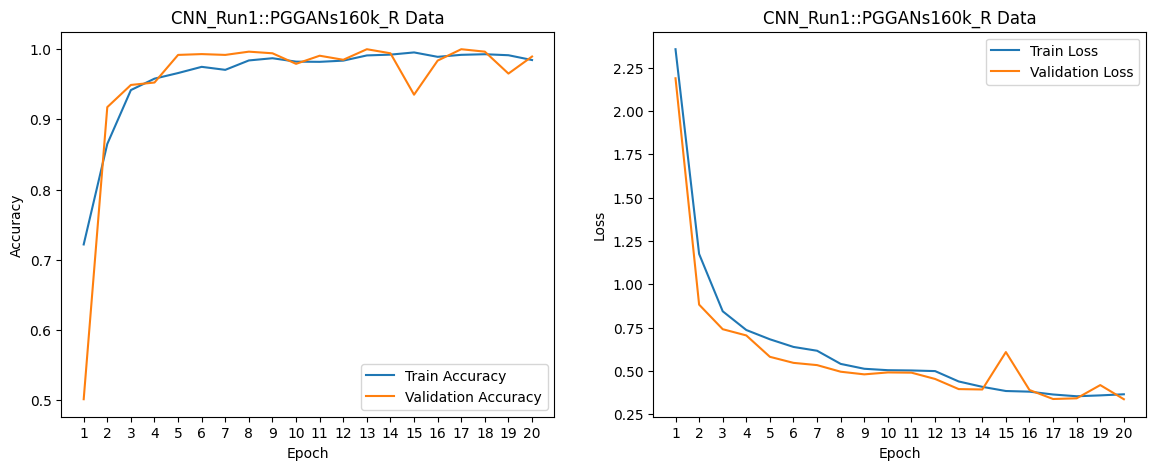

Confusion matrix, without normalization
[[ 868  412]
 [  15 1247]]
              precision    recall  f1-score   support

      NORMAL       0.98      0.68      0.80      1280
   PNEUMONIA       0.75      0.99      0.85      1262

    accuracy                           0.83      2542
   macro avg       0.87      0.83      0.83      2542
weighted avg       0.87      0.83      0.83      2542

Epoch 1/20
110/110 [==============================] - 124s 1s/step - loss: 2.1853 - accuracy: 0.7032 - val_loss: 1.3274 - val_accuracy: 0.7847
Epoch 2/20
110/110 [==============================] - 122s 1s/step - loss: 1.1036 - accuracy: 0.8744 - val_loss: 0.8553 - val_accuracy: 0.9294
Epoch 3/20
110/110 [==============================] - 122s 1s/step - loss: 0.9098 - accuracy: 0.9221 - val_loss: 0.7056 - val_accuracy: 0.9757
Epoch 4/20
110/110 [==============================] - 122s 1s/step - loss: 0.7732 - accuracy: 0.9455 - val_loss: 0.6719 - val_accuracy: 0.9815
Epoch 5/20
110/110 [==============

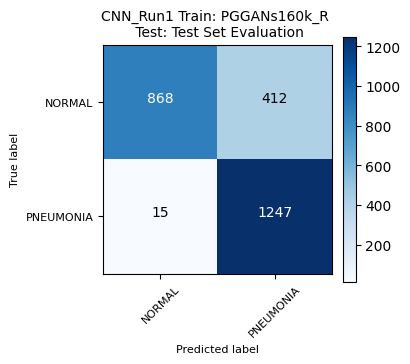

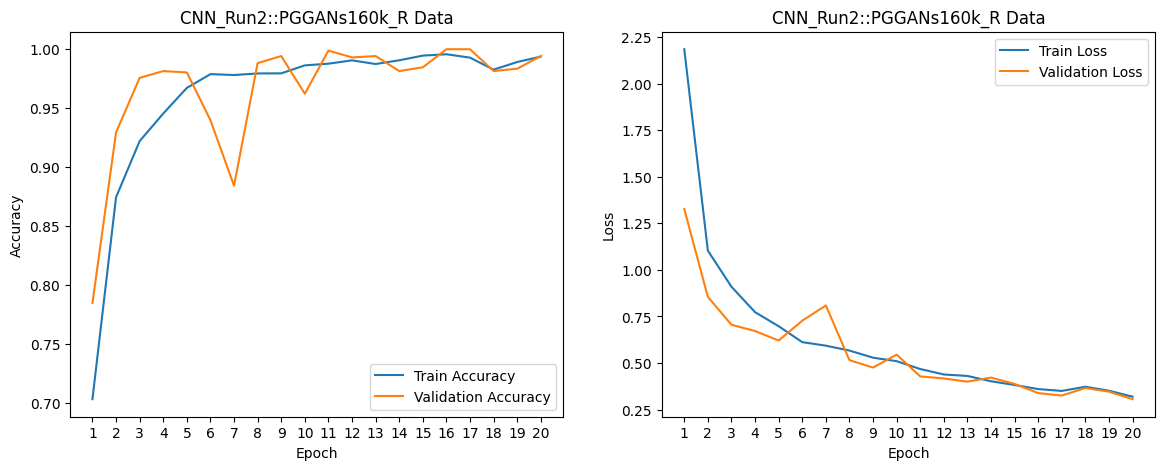

Confusion matrix, without normalization
[[1219  132]
 [  44 1147]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.90      0.93      1351
   PNEUMONIA       0.90      0.96      0.93      1191

    accuracy                           0.93      2542
   macro avg       0.93      0.93      0.93      2542
weighted avg       0.93      0.93      0.93      2542

Epoch 1/20
110/110 [==============================] - 125s 1s/step - loss: 2.3317 - accuracy: 0.7212 - val_loss: 1.2517 - val_accuracy: 0.7731
Epoch 2/20
110/110 [==============================] - 122s 1s/step - loss: 1.0261 - accuracy: 0.8858 - val_loss: 1.0830 - val_accuracy: 0.8160
Epoch 3/20
110/110 [==============================] - 122s 1s/step - loss: 0.9160 - accuracy: 0.9256 - val_loss: 0.7584 - val_accuracy: 0.9316
Epoch 4/20
110/110 [==============================] - 121s 1s/step - loss: 0.7545 - accuracy: 0.9378 - val_loss: 0.6064 - val_accuracy: 0.9838
Epoch 5/20
110/110 [==============

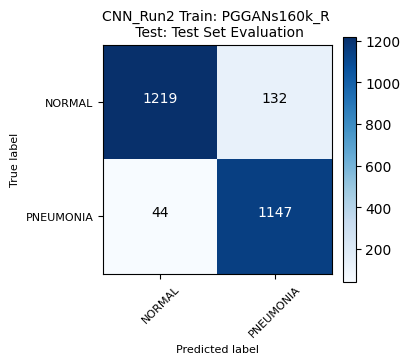

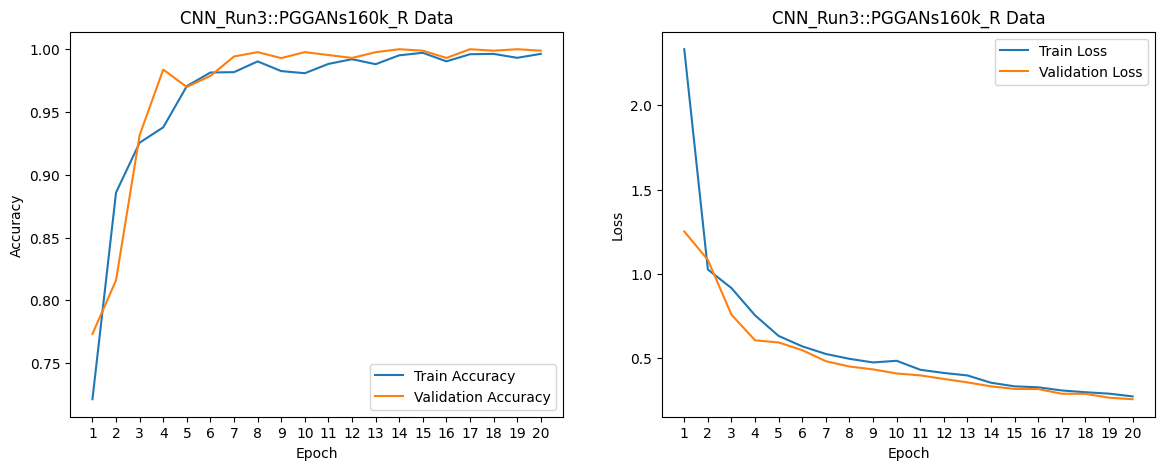

Confusion matrix, without normalization
[[1160  121]
 [ 107 1154]]
              precision    recall  f1-score   support

      NORMAL       0.92      0.91      0.91      1281
   PNEUMONIA       0.91      0.92      0.91      1261

    accuracy                           0.91      2542
   macro avg       0.91      0.91      0.91      2542
weighted avg       0.91      0.91      0.91      2542

Epoch 1/20
110/110 [==============================] - 125s 1s/step - loss: 3.2011 - accuracy: 0.6574 - val_loss: 4.2261 - val_accuracy: 0.5625
Epoch 2/20
110/110 [==============================] - 121s 1s/step - loss: 1.4547 - accuracy: 0.8439 - val_loss: 0.8681 - val_accuracy: 0.9399
Epoch 3/20
110/110 [==============================] - 122s 1s/step - loss: 0.9759 - accuracy: 0.9097 - val_loss: 0.8450 - val_accuracy: 0.9421
Epoch 4/20
110/110 [==============================] - 121s 1s/step - loss: 0.8179 - accuracy: 0.9432 - val_loss: 0.7391 - val_accuracy: 0.9745
Epoch 5/20
110/110 [==============

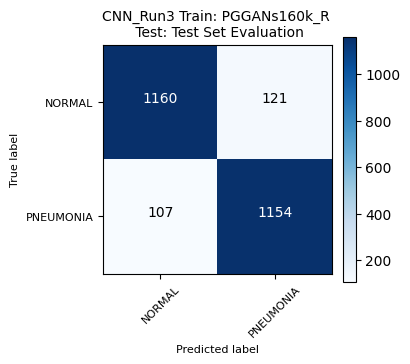

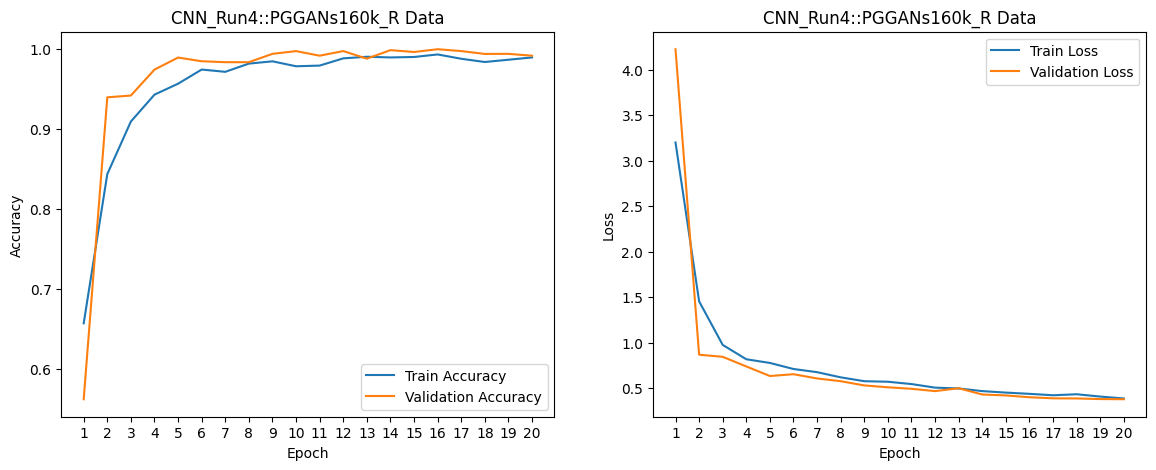

Confusion matrix, without normalization
[[1167   29]
 [ 220 1126]]
              precision    recall  f1-score   support

      NORMAL       0.84      0.98      0.90      1196
   PNEUMONIA       0.97      0.84      0.90      1346

    accuracy                           0.90      2542
   macro avg       0.91      0.91      0.90      2542
weighted avg       0.91      0.90      0.90      2542

Epoch 1/20
110/110 [==============================] - 124s 1s/step - loss: 2.1545 - accuracy: 0.7520 - val_loss: 1.2089 - val_accuracy: 0.7905
Epoch 2/20
110/110 [==============================] - 122s 1s/step - loss: 1.0823 - accuracy: 0.8973 - val_loss: 0.7637 - val_accuracy: 0.9734
Epoch 3/20
110/110 [==============================] - 122s 1s/step - loss: 0.8498 - accuracy: 0.9418 - val_loss: 0.8734 - val_accuracy: 0.9144
Epoch 4/20
110/110 [==============================] - 122s 1s/step - loss: 0.7699 - accuracy: 0.9557 - val_loss: 0.6872 - val_accuracy: 0.9664
Epoch 5/20
110/110 [==============

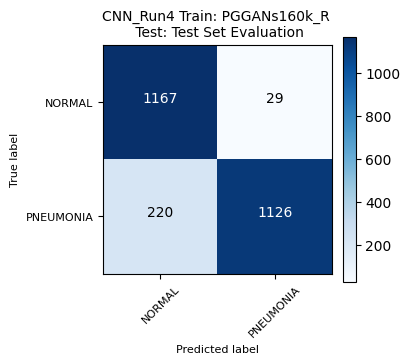

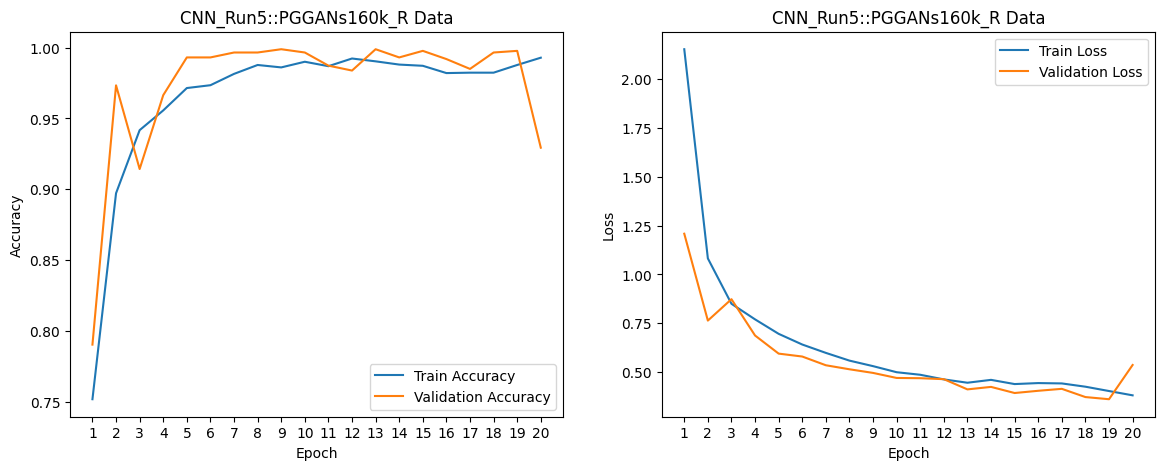

Confusion matrix, without normalization
[[ 908  330]
 [  23 1281]]
              precision    recall  f1-score   support

      NORMAL       0.98      0.73      0.84      1238
   PNEUMONIA       0.80      0.98      0.88      1304

    accuracy                           0.86      2542
   macro avg       0.89      0.86      0.86      2542
weighted avg       0.88      0.86      0.86      2542



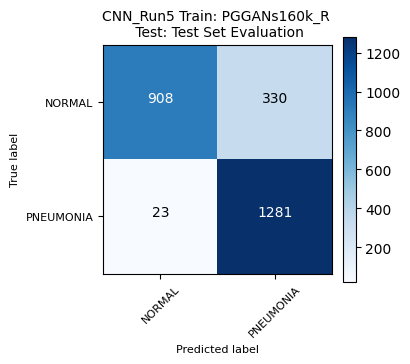

In [5]:
dataset_dir = dataset_dir_pggans160_rand
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds = load_and_preprocess_data(test_dataset_dir_rand, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "PGGANs160k_R Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs160k_R", title="Test Set Evaluation")